In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem # 1

In [92]:
austo=pd.read_csv(r"D:\DSBA\The course\08-SMDM-sep 28-project\austo_automobile+%282%29+%281%29.csv")

In [268]:
austo.shape

(1581, 14)

# A. Important technical information about the dataset that a database administrator would be interested in :


In [93]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


# B. A Critical look at the data - preliminary analysis of the variables-quality check to ensure variables are consistent and finding any discrepancies present in the data

#### preliminary analysis of the variables

In [14]:
austo.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


## Quality Check of the data

### Checking the frequency

In [20]:
austo['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

### Treating the wrong spelling

In [95]:
austo['Gender'] = austo['Gender'].replace('Femal','Female')
austo['Gender'] = austo['Gender'].replace('Femle','Female')

### Checking
The spelling mistake is now treated in the column "Gender"

In [96]:
austo['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

### Checking
Checking for missing values

In [24]:
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [28]:
austo.Partner_salary.mean()

20225.5593220339

### rectifying through fillna function

In [43]:
austo.Gender=austo.Gender.fillna(austo.Gender.mode())
austo.Partner_salary=austo.Partner_salary.fillna(austo.Partner_salary.mean())

### Checking for null value now

In [44]:
austo_edited.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

##### Thus the null value is corrected in the new DataFrame austo_edited. Checking for the distribution

#### checking for duplicates

In [39]:
dups = austo.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


### Thus there are no duplicates

# C.Exploring all features of the data

In [57]:
round(austo.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.92,8.43,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.46,0.94,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.22,14674.83,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20225.56,18905.18,0.0,0.0,24900.0,38000.0,80500.0
Total_salary,1581.0,79626.00,25545.86,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.72,13633.64,18000.0,25000.0,31000.0,47000.0,70000.0


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

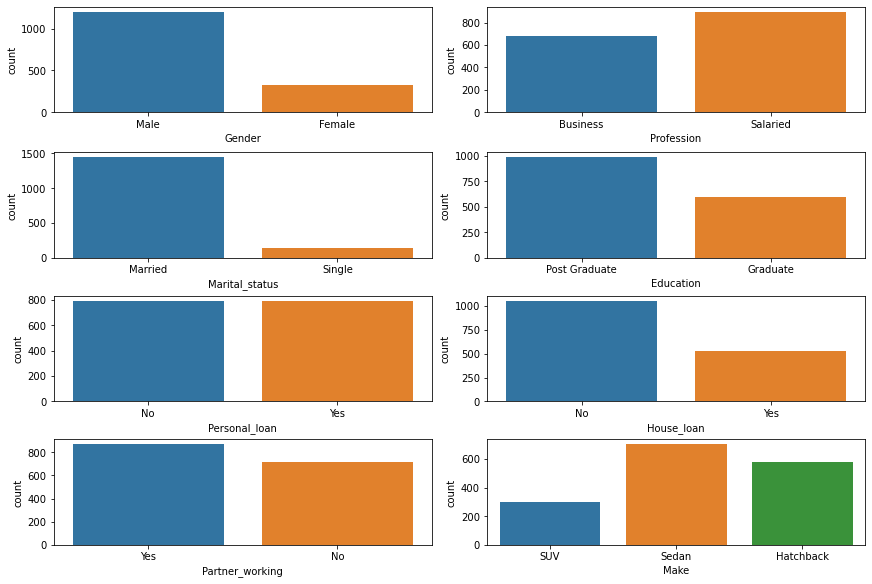

In [273]:
fig, axes = plt.subplots(nrows=4,ncols=2,constrained_layout = True)
fig.set_size_inches(12,8)
sns.countplot(austo['Gender'],  ax=axes[0][0])
sns.countplot(austo['Profession'],  ax=axes[0][1])
sns.countplot(austo['Marital_status'],  ax=axes[1][0])
sns.countplot(austo['Education'],  ax=axes[1][1])
sns.countplot(austo['Personal_loan'],  ax=axes[2][0])
sns.countplot(austo['House_loan'],  ax=axes[2][1])
sns.countplot(austo['Partner_working'],  ax=axes[3][0])
sns.countplot(austo['Make'],  ax=axes[3][1])

plt.show()

#### conclusion : Thus among the categorical variables the following trend is noticed:

1.Number of male candidates are much larger than female candidates.
2.Number of salaried professionals are higher than people doing business.
3.Number of married couples  are much larger than single ones.
4.Number of people having post graduate degtree are higher than people with graduate degrees.
5.Almost equal numbers of people are having or not having personal loans.
6.Number of people having House_loan are higher than people without it.
7.People whose partner's are working were slightly larger in number against those whose aren't.
8.Most popular make is sedan followed by hatchback and then sedan.



# D. relationship among data fields- Analysis to gain deeper insight

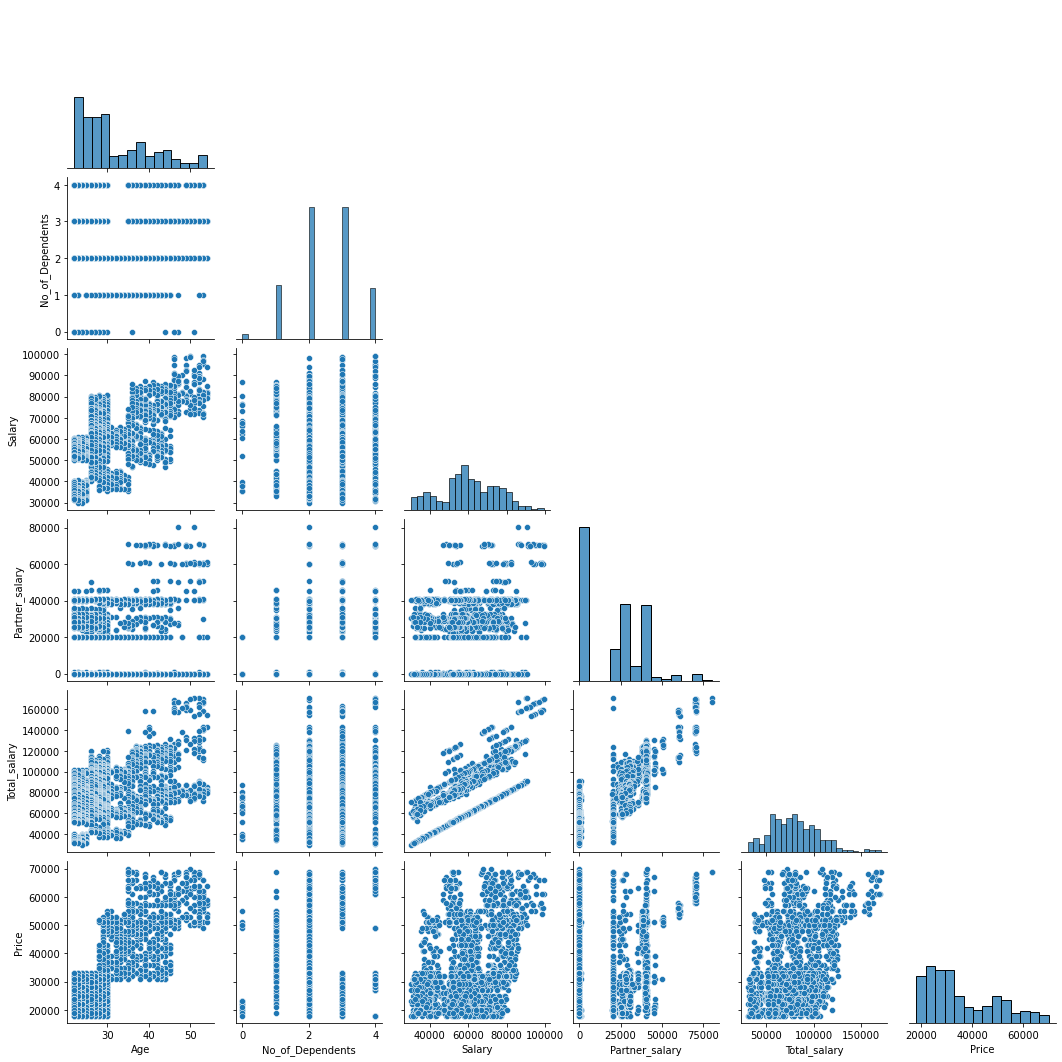

In [59]:
sns.pairplot(austo, corner=True)

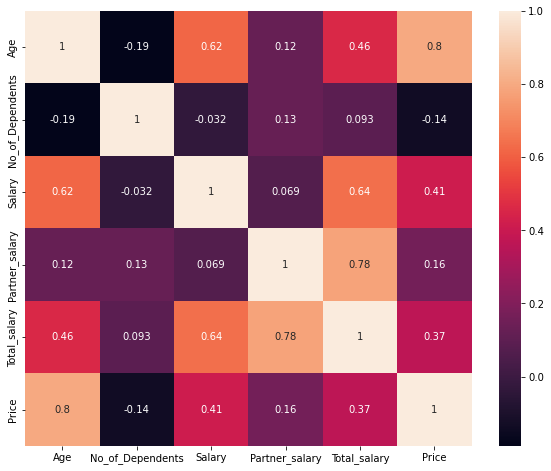

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(austo.corr(),annot=True,fmt=".2g");

In [62]:
round(austo.corr(),2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.00,-0.19,0.62,0.12,0.46,0.80
No_of_Dependents,-0.19,1.00,-0.03,0.13,0.09,-0.14
Salary,0.62,-0.03,1.00,0.07,0.64,0.41
Partner_salary,0.12,0.13,0.07,1.00,0.78,0.16
Total_salary,0.46,0.09,0.64,0.78,1.00,0.37
Price,0.80,-0.14,0.41,0.16,0.37,1.00


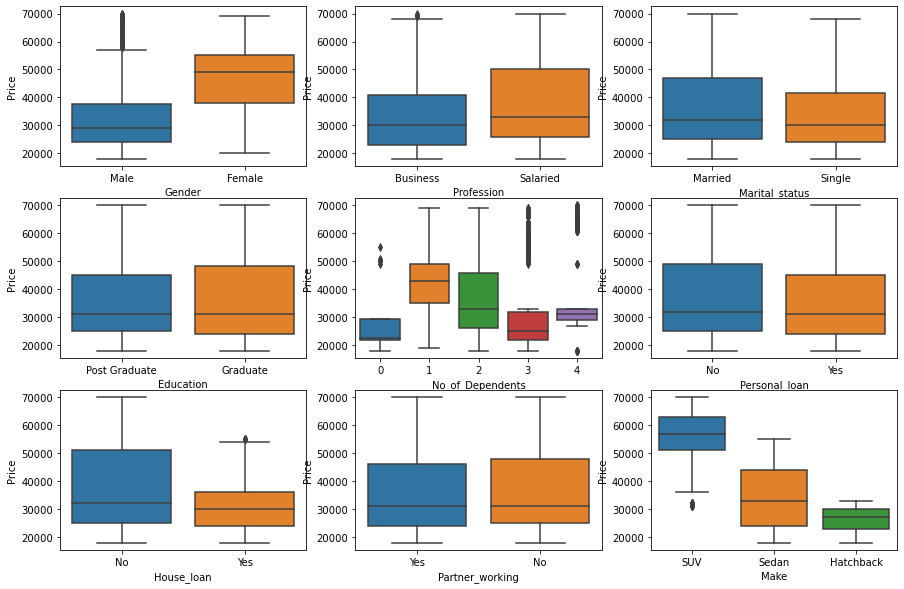

In [112]:
#Analysis categorical vs Numerical
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,10)
sns.boxplot(x='Gender', y='Price', data=austo, ax=axes[0][0]) #comparison between Gender & Price
sns.boxplot(x='Profession', y='Price', data=austo, ax=axes[0][1])#comparison between Profession & Price
sns.boxplot(x='Marital_status', y='Price', data=austo, ax=axes[0][2]) #comparison between Marital_status & Price
sns.boxplot(x='Education', y='Price', data=austo, ax=axes[1][0])#comparison between Education & Price
sns.boxplot(x='No_of_Dependents', y='Price', data=austo, ax=axes[1][1])#comparison between No_of_dependents & Price
sns.boxplot(x='Personal_loan', y='Price', data=austo, ax=axes[1][2])#comparison between Personal_loan & Price
sns.boxplot(x='House_loan', y='Price', data=austo, ax=axes[2][0])#comparison between House_loan & Price
sns.boxplot(x='Partner_working', y='Price', data=austo, ax=axes[2][1])#comparison between Partnet_working & Price
sns.boxplot(x='Make', y='Price', data=austo, ax=axes[2][2])#comparison between Make & Price

plt.show()

#####  Conclusions:
1.Median Price of cars purchased by female buyer was significantly higher than that of male buyers. The price of cars bought by male buyers had a numbers of outliers meaning a lesser numbers of male buyers may be preferring higher priced variants.
2.The median car price of salried people was only a little higher than that by people doing business, however there are a few outlier in the car price of cars owned by the people doing business.
3.The median price of cars owned by married people ws little higher than that owned by their single counterparts.
4.Thus there is not much difference between the median value of cars owned by people having Graduate and Post-Graduate degree.
5.Median value of price of the cars owned by people having no dependents were the lowest with some outliers.People having one dependent bought the costliest cars by median value.While people having two dependents bought cars with the highest inter quartile range.Whereas people having three & four dependents had mostly bought cars having price mostly lower, although there were quaite a few outliers. Thus  people having one followed by two dependent are likely to buy cars costlier than any other category of people categorized as per numbers of  dependents.
6.Thus there is not much difference between the median value of cars owned by people with or without Personal loans. 
7.Thus there is not much difference between the median value of cars owned by people with or without House loans.
8.The median price of SUV was highest follwed by Sedan and Hatchback.

# E - Analysis of Remarks

### E1 : Men prefer SUV by a large margin, compared to the women

In [274]:
round(pd.crosstab(austo['Gender'],austo['Make'], normalize=True,margins=True),2)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.01,0.11,0.09,0.22
Male,0.37,0.08,0.34,0.78
All,0.38,0.19,0.43,1.00


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

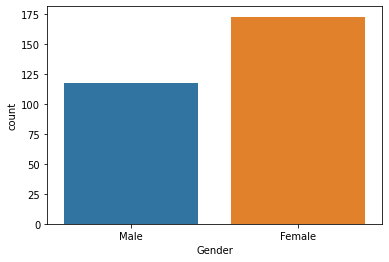

In [275]:
sns.countplot(austo[austo['Make']=='SUV'].Gender)

### Thus of all the cars, 19% are SUV of which 11% are owned by female & 8% by male. Further, among male the most popular is hatchback whereas among female most popular is SUV.Thus SUV ownership is higher by female than male.
## Hence the comment is not correct.

### E2 : salaried person is more likely to buy a Sedan

In [68]:
round(pd.crosstab(austo['Make'],austo['Profession'], normalize=True,margins=True),2)

Profession,Business,Salaried,All
Make,,,
Hatchback,0.18,0.18,0.37
SUV,0.06,0.13,0.19
Sedan,0.19,0.25,0.44
All,0.43,0.57,1.00


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

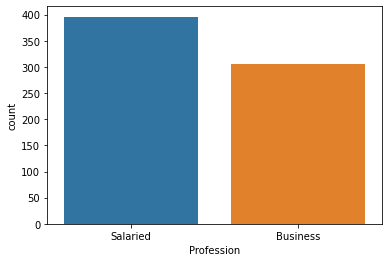

In [276]:
sns.countplot(austo[austo['Make']=='Sedan'].Profession)

### Thus 44% of all cars are sedan type by make. Out of the same, 19% are owned by people doing business as profession & 25% are owned by people who are salaried. Further, of all cars 57% is owned by people who are salaried. Among the salaried people the most poular is the sedan type.

## Hence, the comment is correct

## E3 : a salaried male is an easier target for a SUV sale over a Sedan Sale

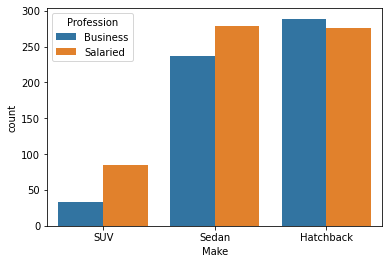

In [69]:
sns.countplot(x='Make', hue='Profession', data=austo[austo['Gender']=='Male']);

### To verify the data, the dataframe was filtered for male gender only. Plotting for their choice of car, separately for business and salaried persons shows that salaried men prefer sedan much more than SUV.

## Hence, the comment is not correct

## F: amount spent on purchasing automobiles across the following categories

### 	F1) Gender

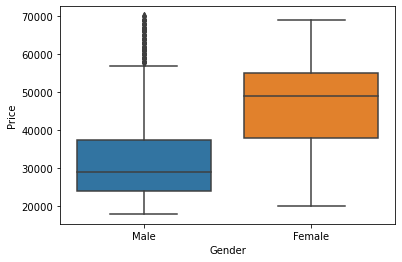

In [71]:
fig_dims = (12, 5)
sns.boxplot(x='Gender', y='Price', data=austo);

In [278]:
round(austo[austo['Gender']=='Male'].Price.describe(),2)


count     1199.00
mean     32817.35
std      12299.24
min      18000.00
25%      24000.00
50%      29000.00
75%      37500.00
max      70000.00
Name: Price, dtype: float64

In [279]:
round(austo[austo['Gender']=='Female'].Price.describe(),2)

count      329.00
mean     47705.17
std      11244.84
min      20000.00
25%      38000.00
50%      49000.00
75%      55000.00
max      69000.00
Name: Price, dtype: float64

### Inference 1. The median purchase price of car for female was significantly higher than that of by male.However, there were good numbers of higher priced outlier for male signifying there could be a niche set of male customers preferring costlier varient of cars.

### F2) Personal Loan

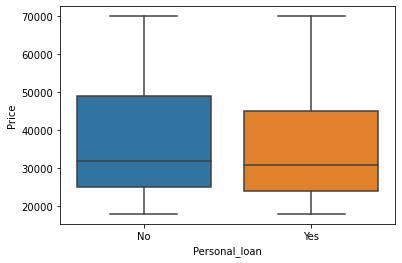

In [72]:
fig_dims = (12, 5)
sns.boxplot(x='Personal_loan', y='Price', data=austo);

In [281]:
round(austo[austo['Personal_loan']=='Yes'].Price.describe(),2)

count      792.00
mean     34457.07
std      12578.78
min      18000.00
25%      24000.00
50%      31000.00
75%      45000.00
max      70000.00
Name: Price, dtype: float64

In [282]:
round(austo[austo['Personal_loan']=='No'].Price.describe(),2)

count      789.00
mean     36742.71
std      14534.34
min      18000.00
25%      25000.00
50%      32000.00
75%      49000.00
max      70000.00
Name: Price, dtype: float64

### Inference 1. Thus having personal loan had minimal impact on the price of cars bought as the median value of price of car for both the groups i.e. with and without personal loan was almost the same.

## G: Having a working partner leads to the purchase of a higher-priced car?

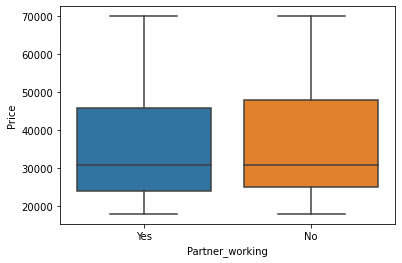

In [74]:
fig_dims = (12, 5)
sns.boxplot(x='Partner_working', y='Price', data=austo);

In [283]:
round(austo[austo['Partner_working']=='Yes'].Price.describe(),2)

count      868.00
mean     35267.28
std      13479.53
min      18000.00
25%      24000.00
50%      31000.00
75%      46000.00
max      70000.00
Name: Price, dtype: float64

In [284]:
round(austo[austo['Partner_working']=='No'].Price.describe(),2)

count      713.00
mean     36000.00
std      13817.73
min      18000.00
25%      25000.00
50%      31000.00
75%      48000.00
max      70000.00
Name: Price, dtype: float64

### There seems to be no difference in the median value of car price between those whose partner's were working and those whose weren't.Further, there was no outlier in either case indicating that the mean values were also similar.

## H : Devise an improved marketing strategy to send targeted information to different groups of potential buyers using the Gender and Marital_status - fields to arrive at groups with similar purchase history

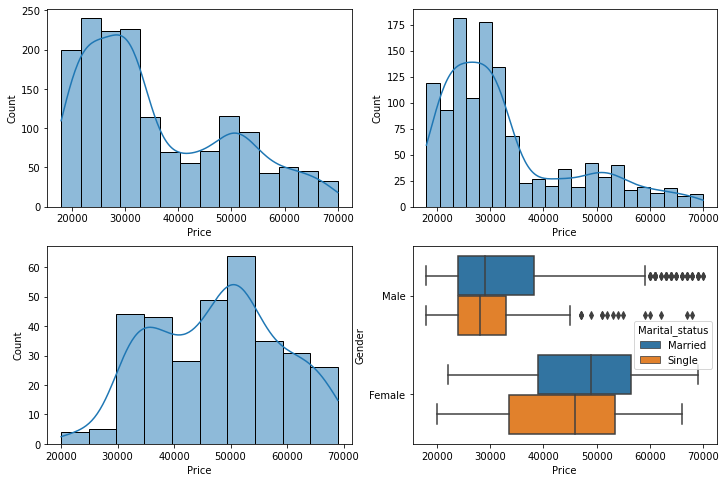

In [89]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,8)
sns.histplot(austo['Price'], kde=True, ax=axes[0][0])
sns.histplot(austo[austo['Gender']=='Male'].Price, kde=True, ax=axes[0][1])
sns.histplot(austo[austo['Gender']=='Female'].Price, kde=True, ax=axes[1][0])
sns.boxplot(x='Price',y='Gender',hue="Marital_status",data=austo, ax=axes[1][1])

plt.show()

### Observation : 
1.Overall maximum numbers of cars are priced between 25,000 to 30,000 followed by the next most frequest price range around 50,000.
2.Median Price of cars bought by male was 30,000 whereas the same bought by female was around 50,000. Thus female were more attractive customer group.
3.Splitting further by Gender, it is observed that inter quartile range of car price( representing the 50% of the overall sample) was higher for married females as compared to the single female.Thus married female were mostly buying the costliest cars when grouped in terms of gender and marital status, representing the premium segment.

In [90]:
round(pd.crosstab(austo['Gender'],austo['Marital_status'], normalize=True,margins=True),2)

Marital_status,Married,Single,All
Gender,,,
Female,0.20,0.01,0.22
Male,0.71,0.07,0.78
All,0.91,0.09,1.00


#### However, married male comprises majority of the overall cars sold.Thus, this is the mass segment generating maximum sale.

<Figure size 1080x864 with 0 Axes>

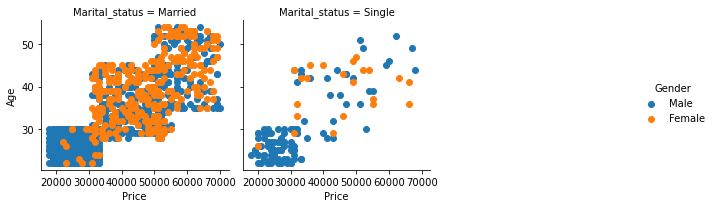

In [78]:
plt.figure(figsize=(15,12));
g = sns.FacetGrid(austo, col="Marital_status", hue='Gender',col_wrap=3, height=3);
g = g.map(plt.scatter, "Price", 'Age');
g.add_legend()

### Observation 3: Among all other factors, age was having the highest correlation with price.Plotting age with price for various group indicates that for both marries male and female higher age yields higher probability of buying a costlier car thus indicating the focus segment for the company.

#  Problem # 2




In [117]:
GODIGT=pd.read_excel(r"D:\DSBA\The course\08-SMDM-sep 28-project\godigt_cc_data.xlsx")
GODIGT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [136]:
# convert a few columns to a category
GODIGT[["userid",'card_bin_no']] =GODIGT[["userid",'card_bin_no']].astype('object')
GODIGT.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   object        
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   object        
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [285]:
GODIGT.nlargest(5,'T+12_month_activity').T

,28,223,525,582,710
userid,29,224,526,583,711
card_no,4386 28XX XXXX XXXX,4055 33XX XXXX XXXX,4258 06XX XXXX XXXX,4258 06XX XXXX XXXX,4262 41XX XXXX XXXX
card_bin_no,438628,405533,425806,425806,426241
Issuer,Visa,Visa,Visa,Visa,Visa
card_type,rewards,smartearn,prosperity,smartearn,rewards
card_source_date,2004-07-08 00:00:00,2004-11-30 00:00:00,2007-12-02 00:00:00,2005-10-16 00:00:00,2015-06-24 00:00:00
high_networth,D,C,B,C,E
active_30,1,1,1,1,1
active_60,1,1,1,1,1
active_90,1,1,1,1,1


In [127]:
GODIGT.isnull().sum()


userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

##### Dropping nan valued cells

In [146]:
GODIGT=GODIGT.dropna()

##### Separating numercial and categorical dataframes

In [147]:
GODIGT_num=GODIGT.select_dtypes(['int64','datetime64'])

GODIGT_cat=GODIGT.select_dtypes(['object'])


##### checking the correlation between various numercial variables



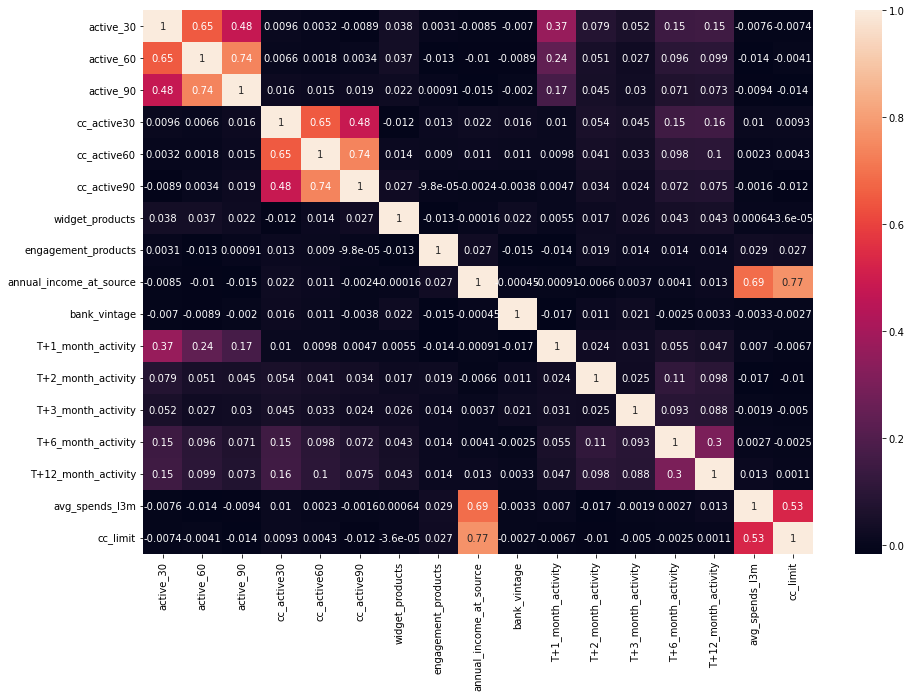

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(GODIGT_num.corr(),annot=True,fmt=".2g");


#### Conclusion : Avergae spends is somewhat correlated with annual_income_at_source

### Checking for outliers in the dataset

In [148]:
round(GODIGT.describe().T,2)


,count,mean,std,min,25%,50%,75%,max
active_30,8410.0,0.29,0.45,0.0,0.0,0.0,1.0,1.0
active_60,8410.0,0.49,0.50,0.0,0.0,0.0,1.0,1.0
active_90,8410.0,0.64,0.48,0.0,0.0,1.0,1.0,1.0
cc_active30,8410.0,0.28,0.45,0.0,0.0,0.0,1.0,1.0
cc_active60,8410.0,0.48,0.50,0.0,0.0,0.0,1.0,1.0
cc_active90,8410.0,0.63,0.48,0.0,0.0,1.0,1.0,1.0
widget_products,8410.0,3.63,2.27,0.0,2.0,4.0,6.0,7.0
engagement_products,8410.0,4.01,2.57,0.0,2.0,4.0,6.0,8.0
annual_income_at_source,8410.0,1674373.88,1064592.21,200095.0,1061494.5,1371687.0,1881414.5,4999508.0
bank_vintage,8410.0,33.16,15.87,6.0,19.0,33.0,47.0,60.0


#### Prima facie there seems to be outlier in the following parameters :

1.annual_income_at_source
2.avg_spends_l3m
3.cc_limit


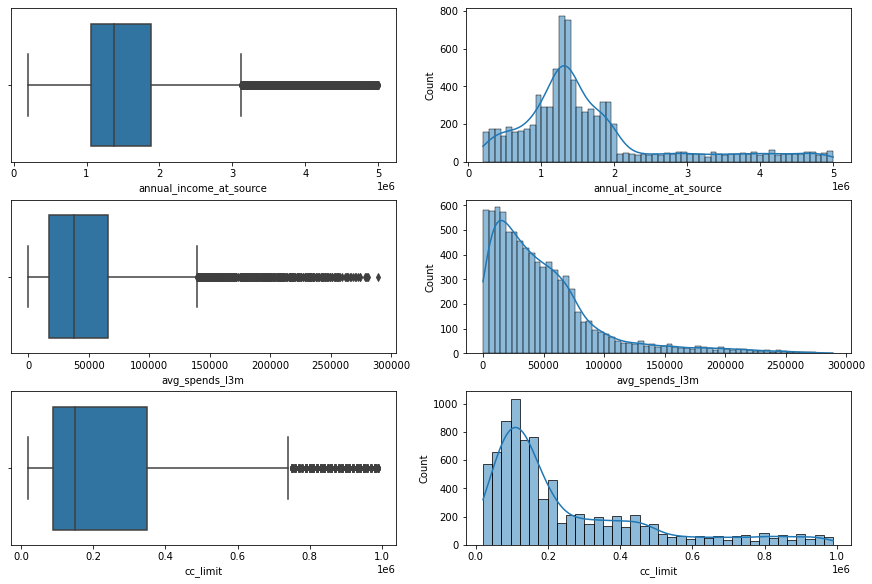

In [164]:
fig, axes = plt.subplots(nrows=3,ncols=2, constrained_layout = True)
fig.set_size_inches(12,8)
sns.boxplot(x=GODIGT.annual_income_at_source,ax=axes[0][0] )
sns.histplot(GODIGT.annual_income_at_source, kde=True, ax=axes[0][1])

sns.boxplot(x=GODIGT.avg_spends_l3m,ax=axes[1][0] )
sns.histplot(GODIGT.avg_spends_l3m, kde=True, ax=axes[1][1])

sns.boxplot(x=GODIGT.cc_limit,ax=axes[2][0] )
sns.histplot(GODIGT.cc_limit, kde=True, ax=axes[2][1])
plt.show()


#### Conclusion : Thus all these three variables are right skewed hence, their mean is not a reliable estimate.

Skewness and kutosis which is supposed to be within +1 to -1 are checked for the original variables and transformed variables

In [183]:
print(GODIGT.annual_income_at_source.skew())
print(GODIGT.annual_income_at_source.kurtosis())

print(np.log(GODIGT.annual_income_at_source).skew())
print(np.log(GODIGT.annual_income_at_source).kurtosis())


1.4488435545601341
1.6084350576998272
-0.3626943463975141
0.6290573186923445


#####  Thus if annual_income_at_source is log transformed, the output is somewhat normal

In [186]:
print(GODIGT.cc_limit.skew())
print(GODIGT.cc_limit.kurtosis())

print(np.log(GODIGT.cc_limit).skew())
print(np.log(GODIGT.cc_limit).kurtosis())


1.5144216997816742
1.518839937965807
-0.010172832024915798
-0.46359524938569674


#####  Thus if cc_limit is log transformed, the output is somewhat normal

In [189]:
print(GODIGT.avg_spends_l3m.skew())
print(GODIGT.avg_spends_l3m.kurtosis())

print(np.sqrt(GODIGT.avg_spends_l3m).skew())
print(np.sqrt(GODIGT.avg_spends_l3m).kurtosis())

1.8903206578181937
4.306690564912133
0.6022732099233273
0.38890615922196403


#####  Log transformation didn't give normal distribution. Thus if avg_spends_l3m is square root transformed, the output is somewhat normal

C:\Users\Admin\AppData\Local\Temp/ipykernel_6524/733367648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GODIGT_num['avg_spends_l3m_trans']=np.sqrt(GODIGT.avg_spends_l3m)
C:\Users\Admin\AppData\Local\Temp/ipykernel_6524/733367648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GODIGT_num['cc_limit_trans']=np.log(GODIGT.cc_limit)
C:\Users\Admin\AppData\Local\Temp/ipykernel_6524/733367648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

<AxesSubplot:>

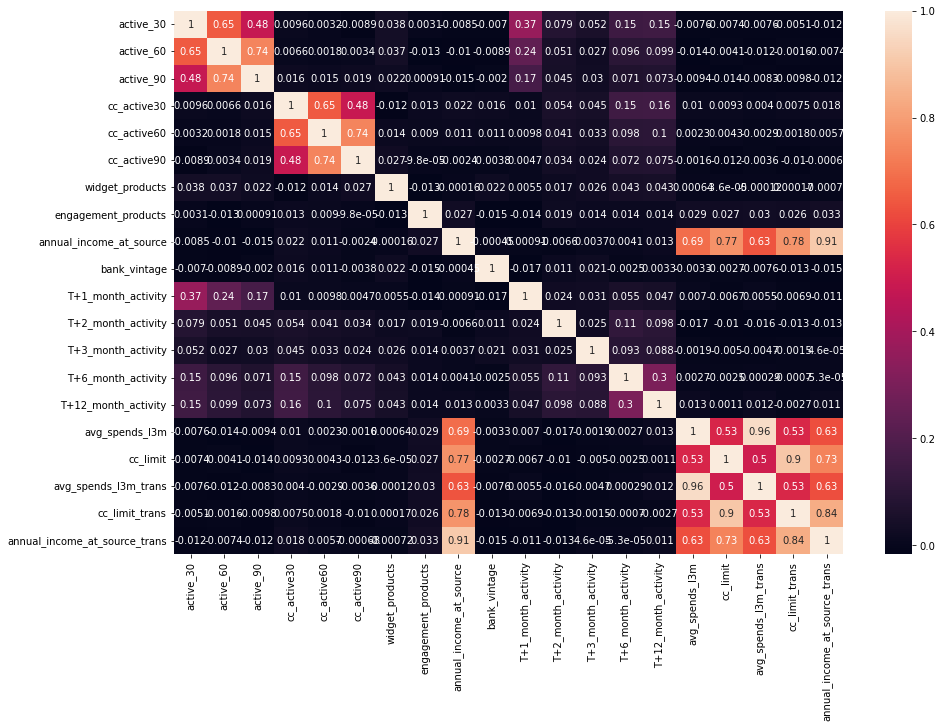

In [204]:
GODIGT_num['avg_spends_l3m_trans']=np.sqrt(GODIGT.avg_spends_l3m)
GODIGT_num['cc_limit_trans']=np.log(GODIGT.cc_limit)
GODIGT_num['annual_income_at_source_trans']=np.log(GODIGT.annual_income_at_source)

round(GODIGT_num.describe().T,2)

plt.figure(figsize=(15,10))
sns.heatmap(GODIGT_num.corr(), annot=True, fmt='.2g')

#### Conclusion #1 : avg_spends_13m has somewhat good correlation with annual_income_at_source & cc_limit

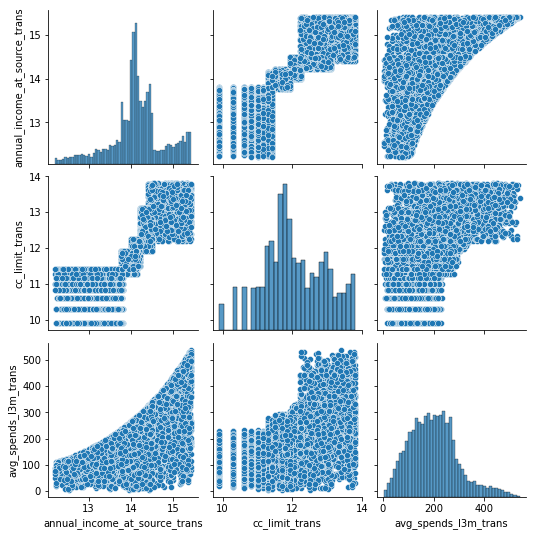

In [219]:
# creating pairplot of correlated factors with avg_spends_13m



sns.pairplot(data=GODIGT_num[['annual_income_at_source_trans', 'cc_limit_trans', 'avg_spends_l3m_trans']])





### Now checking the relation between the categorical variables and the average spend in last 13 months

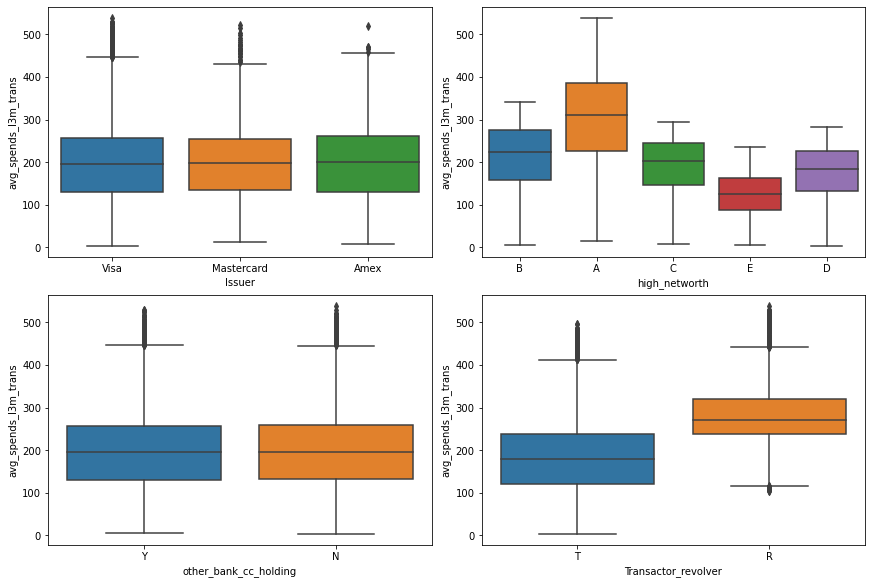

In [254]:
fig, axes = plt.subplots(nrows=2,ncols=2, constrained_layout = True)
fig.set_size_inches(12,8)

sns.boxplot(data=GODIGT, x='Issuer', y= 'avg_spends_l3m_trans',ax=axes[0][0] )
sns.boxplot(data=GODIGT, x='high_networth', y= 'avg_spends_l3m_trans',ax=axes[0][1])
sns.boxplot(data=GODIGT, x='other_bank_cc_holding', y= 'avg_spends_l3m_trans',ax=axes[1][0] )
sns.boxplot(data=GODIGT, x='Transactor_revolver', y= 'avg_spends_l3m_trans',ax=axes[1][1])

plt.show()


#### Conclusion : 1.The high_networth type A are the most valuable customer for the bank based on their median range of average spend.2.Transactor revolvers  in general spend more on credit card as transactors based on median range of average spending during a year. 

<AxesSubplot:xlabel='avg_spends_l3m', ylabel='card_type'>

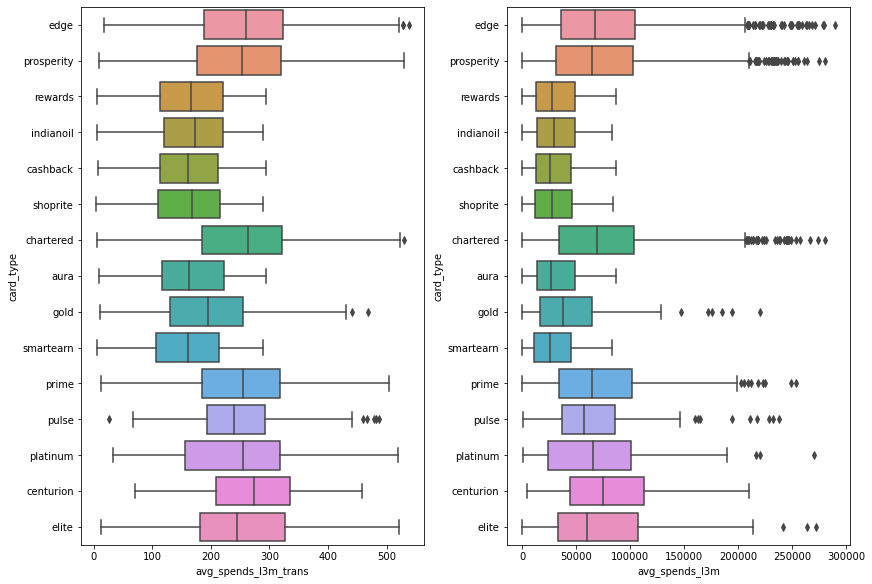

In [257]:
fig, axs = plt.subplots(nrows=1,ncols=2, constrained_layout = True)
fig.set_size_inches(12,8)
sns.boxplot(data=GODIGT, y='card_type', x= 'avg_spends_l3m_trans',ax=axs[0])
sns.boxplot(data=GODIGT, y='card_type', x= 'avg_spends_l3m',ax=axs[1])




##### Conclusion : Thus the most profitable card type earning the maximum revenue for the bank are :
edge,prosperity,chartered and centurion earning maximum revenue based on median range of average annual spend.

<AxesSubplot:xlabel='Occupation_at_source', ylabel='annual_income_at_source'>

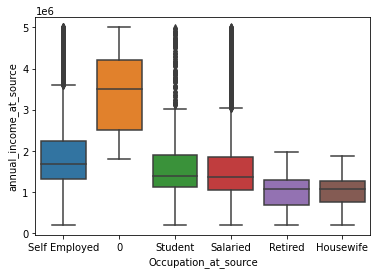

In [229]:
#GODIGT[GODIGT['Occupation_at_source'==0]]
sns.boxplot(data=GODIGT, x='Occupation_at_source', y= 'annual_income_at_source')



### comments: It is not clear what is the profession of those who are tagged as 0 probably due to lack of data. However, it seems as a group they denote a lucrative segment for the business as the median avergae spend for the group is highest. It may be worthwhile for the business team to check for the profession of these people so as to gain valuable insight